In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot

In [4]:
data=pd.read_csv("D:\\Excel R\\Assignments\\Assignment 5\\50_Startups.csv")

In [5]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data.iloc[:,3]=LE.fit_transform(data.iloc[:,3])

In [11]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [12]:
### Correlation:-
data.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [13]:
data.rename(columns={'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MS'},inplace=True)
data

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


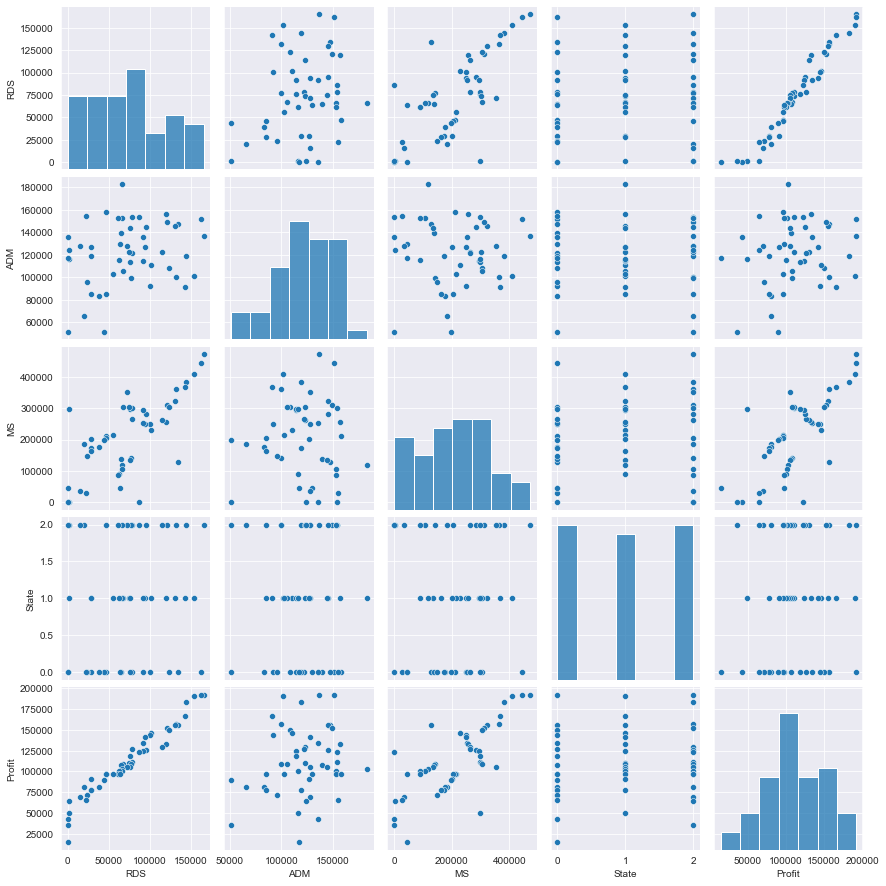

In [14]:
### Pair Plots:-
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [15]:
### Fitting the Model:-
model=smf.ols('Profit~RDS+ADM+MS+State',data=data).fit()

In [18]:
### Model Parameters:-
model.params

Intercept    50142.506443
RDS              0.805760
ADM             -0.026826
MS               0.027228
State          -22.320577
dtype: float64

In [19]:
### t and p-values:-
print(model.tvalues,'\n','\n',model.pvalues)

Intercept     7.368962
RDS          17.608621
ADM          -0.519906
MS            1.636966
State        -0.013865
dtype: float64 
 
 Intercept    2.900008e-09
RDS          8.249206e-22
ADM          6.056771e-01
MS           1.086131e-01
State        9.889988e-01
dtype: float64


In [20]:
### R-squared values:-
(model.rsquared,model.rsquared_adj)

(0.9507462044842656, 0.9463680893273114)

In [22]:
### Simple Linear Regression Models:-
ml_adm=smf.ols('Profit~ADM',data=data).fit()
print(ml_adm.tvalues,'\n','\n',ml_adm.pvalues)

Intercept    3.040044
ADM          1.419493
dtype: float64 
 
 Intercept    0.003824
ADM          0.162217
dtype: float64


In [24]:
ml_ms=smf.ols('Profit~MS',data=data).fit()
print(ml_ms.tvalues,'\n','\n',ml_ms.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 
 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [25]:
ml_st=smf.ols('Profit~State',data=data).fit()
print(ml_st.tvalues,'\n','\n',ml_st.pvalues)

Intercept    11.891440
State         0.708948
dtype: float64 
 
 Intercept    6.485443e-16
State        4.817858e-01
dtype: float64


In [28]:
### Calculation of VIF:-
rsq_rds=smf.ols('RDS~ADM+MS+State',data=data).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_ms=smf.ols('MS~RDS+ADM+State',data=data).fit().rsquared
vif_ms=1/(1-rsq_ms)

rsq_st=smf.ols('State~RDS+ADM+MS',data=data).fit().rsquared
vif_st=1/(1-rsq_st)

rsq_adm=smf.ols('ADM~RDS+MS+State',data=data).fit().rsquared
vif_adm=1/(1-rsq_adm)

### Storing VIF values in a data frame:-
vifdata={'Variables':['RDS','ADM','MS','State'],'VIF':[vif_rds,vif_adm,vif_ms,vif_st]}
vifdata=pd.DataFrame(vifdata)
vifdata

,Variables,VIF
0,RDS,2.481178
1,ADM,1.175315
2,MS,2.326780
3,State,1.011281


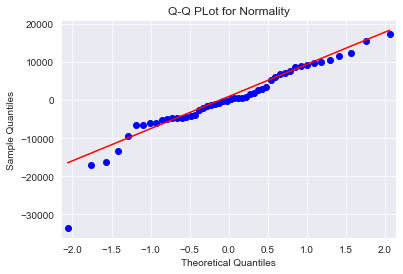

In [29]:
### Residual Analysis:-
sm.qqplot(model.resid,line='q')
plt.title('Q-Q PLot for Normality')
plt.show()

In [30]:
### Residual Plot for Homoscedasticity:-
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

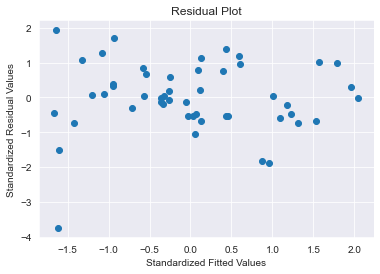

In [31]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

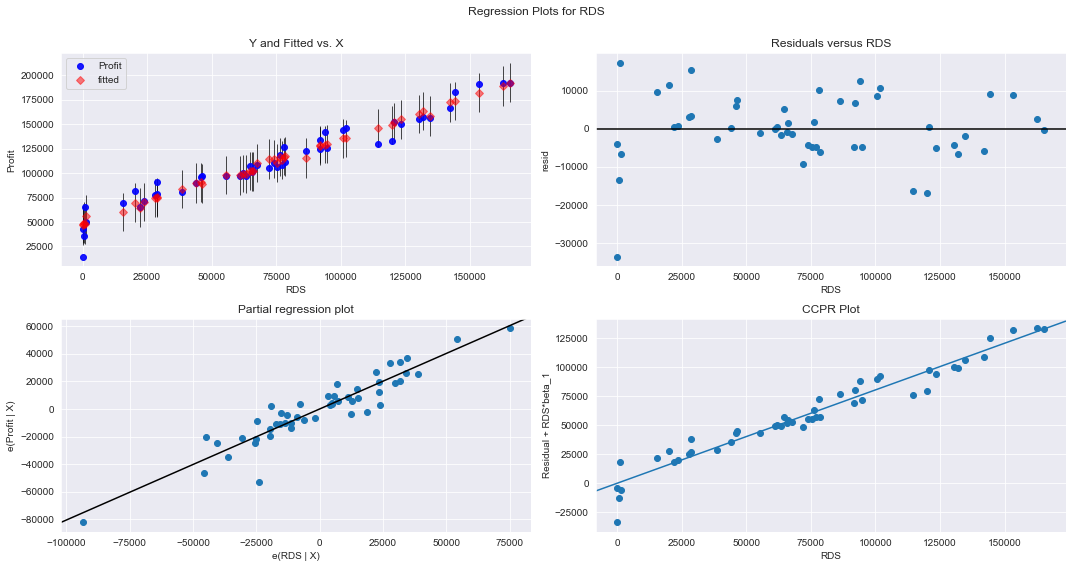

In [32]:
### Residuals vs Regressors:-
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

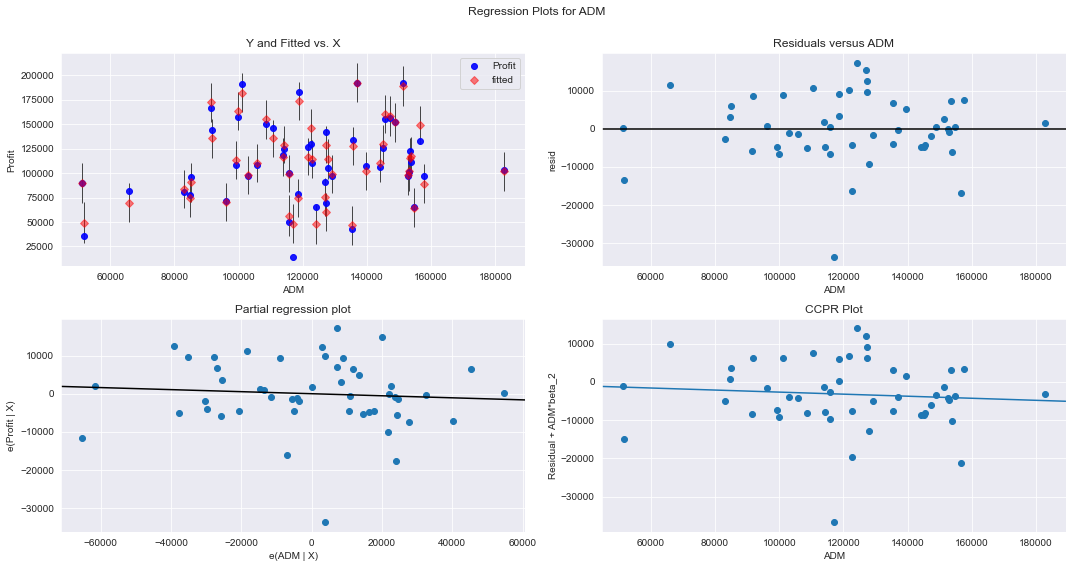

In [33]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'ADM',fig=fig)
plt.show()

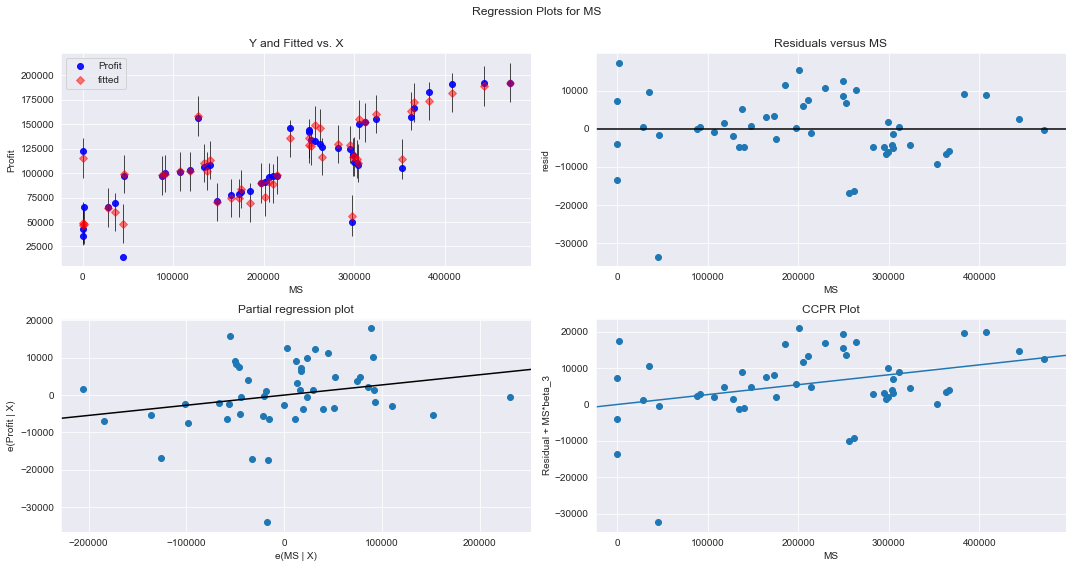

In [34]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

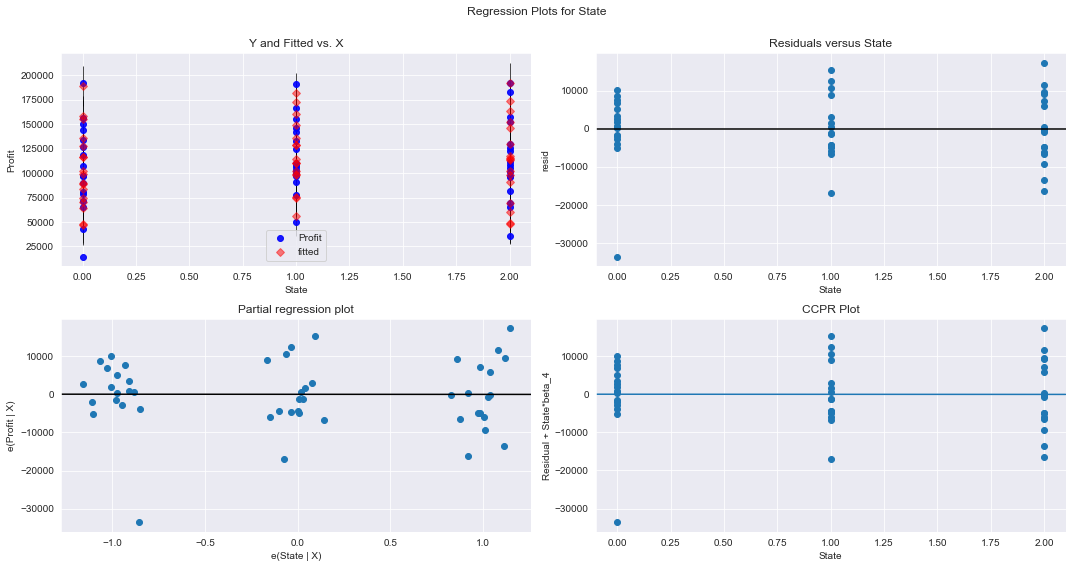

In [35]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'State',fig=fig)
plt.show()

In [37]:
### PRedcition of New-Data:-
newdata=pd.DataFrame({'RDS':[130000,300000,460000],'ADM':[154200,45987,359761],'MS':[487959,540000,780000],'State':[1,0,2]})
newdata

,RDS,ADM,MS,State
0,130000,154200,487959,1
1,300000,45987,540000,0
2,460000,359761,780000,2


In [38]:
model.predict(newdata)

0    164018.383629
1    305339.710154
2    432334.002935
dtype: float64

In [39]:
print(model.rsquared,model.rsquared_adj)

0.9507462044842656 0.9463680893273114
